In [24]:
# Install necessary libraries and packages
import os 
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Define the relative path to the dataset
excel_file_path= "../data/Credit_Risk_Dataset.xlsx"

# Load all sheets into a dictionary
all_sheets= pd.read_excel(excel_file_path, sheet_name= None)

# Iterate over sheets and print their shapes
for sheet_name, df in all_sheets.items():
    print(f'Sheet: {sheet_name}, Shape: {df.shape}')

Sheet: loan_information, Shape: (134417, 5)
Sheet: Employment, Shape: (134417, 7)
Sheet: Personal_information, Shape: (134417, 8)
Sheet: Other_information, Shape: (134417, 7)


In [3]:
# Examine first few rows and data summaries
for sheet_name, df in all_sheets.items():
    print(f'-- {sheet_name} --')
    print('Columns:', df.columns.tolist())
    print('Head:')
    print(df.head)
    print('Info:')
    print(df.info)
    print('\n')

-- loan_information --
Columns: ['User_id', 'Loan Category', 'Amount', 'Interest Rate', 'Tenure(years)']
Head:
<bound method NDFrame.head of          User_id  Loan Category    Amount  Interest Rate  Tenure(years)
0        7013527  Consolidation   55884.0          11.84              6
1        7014291  Consolidation   55511.0          16.94              4
2        7014327  Consolidation   12289.0          11.84              6
3        7014304    Credit Card   29324.0          14.71              4
4        7031995    Credit Card   30252.0          14.71              4
...          ...            ...       ...            ...            ...
134412  55993166    Credit Card  287564.0          12.06              6
134413  56263229         Other    49612.0          14.10              4
134414  55992716  Consolidation   13632.0          18.96              6
134415  56363313           Home  186923.0           8.28              4
134416  56122051  Consolidation  181161.0          15.87           

In [4]:
# Extract each sheet into a DataFrame
loan_info= all_sheets['loan_information']
employment= all_sheets['Employment']
personal_info= all_sheets['Personal_information']
other_info= all_sheets['Other_information']

# Standardize the User ID column name for merging
loan_info= loan_info.rename(columns= {'User_id': 'User_id'})
employment= employment.rename(columns= {'User id': 'User_id'})
personal_info= personal_info.rename(columns= {'User id': 'User_id'})
other_info= other_info.rename(columns= {'User_id': 'User_id'})

# Merge DataFrames on the common 'User_id' column
df_merged= loan_info.merge(employment, on= 'User_id', how= 'left') \
                    .merge(personal_info, on= 'User_id', how= 'left') \
                    .merge(other_info, on= 'User_id', how= 'left')

# Verify the new merged dataset
print('Merged DataFrame Shape:', df_merged.shape)
df_merged.head()


Merged DataFrame Shape: (143727, 24)


,User_id,Loan Category,Amount,Interest Rate,Tenure(years),Employmet type,Tier of Employment,Industry,Role,Work Experience,...,Home,Pincode,Social Profile,Is_verified,Delinq_2yrs,Total Payement,Received Principal,Interest Received,Number of loans,Defaulter
0,7013527,Consolidation,55884.0,11.84,6,Salaried,B,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGAZSEWdkcndwkcnCCM,1-2,...,rent,XX852X,No,NaN,0,1824.150000,971.46,852.69,0,1
1,7014291,Consolidation,55511.0,16.94,4,Self - Employeed,D,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGNCSEWdkcndwkcnCCM,10+,...,mortgage,XX286X,NaN,Source Verified,0,22912.532998,18000.00,4912.53,0,0
2,7014327,Consolidation,12289.0,11.84,6,missing,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGNYSEWdkcndwkcnCCM,5-10,...,own,XX113X,No,NaN,0,7800.440000,4489.76,3310.68,0,1
3,7014304,Credit Card,29324.0,14.71,4,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGCASEWdkcndwkcnCCM,2-3,...,rent,XX941X,Yes,NaN,0,6672.050000,5212.29,1459.76,0,0
4,7031995,Credit Card,30252.0,14.71,4,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGCASEWdkcndwkcnCCM,10+,...,rent,XX913X,No,Verified,0,11793.001345,10000.00,1793.00,0,0


In [8]:
# Explore data types
print('DataFrame Data Types:')
df_merged.dtypes

DataFrame Data Types:


User_id                 int64
Loan Category          object
Amount                float64
Interest Rate         float64
Tenure(years)           int64
Employmet type         object
Tier of Employment     object
Industry               object
Role                   object
Work Experience        object
Total Income(PA)      float64
Gender                 object
Married                object
Dependents              int64
Home                   object
Pincode                object
Social Profile         object
Is_verified            object
Delinq_2yrs             int64
Total Payement        float64
Received Principal    float64
Interest Received     float64
Number of loans         int64
Defaulter               int64
dtype: object

In [9]:
# Explore the data
df.describe()

,User_id,Delinq_2yrs,Total Payement,Received Principal,Interest Received,Number of loans,Defaulter
count,1.344170e+05,134417.000000,134417.000000,134417.000000,134417.000000,134417.000000,134417.000000
mean,3.897888e+07,0.283104,10696.436129,8282.676235,2335.874520,0.005647,0.090413
std,3.168430e+07,0.799212,8544.311643,7184.016451,2419.909636,0.099049,0.286773
min,2.080360e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.340996e+06,0.000000,4623.230000,3047.390000,839.520000,0.000000,0.000000
50%,5.871844e+07,0.000000,8061.140000,5869.120000,1627.030000,0.000000,0.000000
75%,6.759354e+07,0.000000,13940.160000,11325.000000,2889.880000,0.000000,0.000000
max,7.895894e+07,22.000000,57777.579870,35000.010000,24205.620000,5.000000,1.000000


In [10]:
# Check for missing values
print('Missing Values:')
df_merged.isnull().sum()

Missing Values:


User_id                   0
Loan Category             0
Amount                31924
Interest Rate             0
Tenure(years)             0
Employmet type        84641
Tier of Employment    84642
Industry                  4
Role                      0
Work Experience           4
Total Income(PA)          0
Gender                    0
Married               48143
Dependents                0
Home                      0
Pincode                   0
Social Profile        47856
Is_verified           35803
Delinq_2yrs               0
Total Payement            0
Received Principal        0
Interest Received         0
Number of loans           0
Defaulter                 0
dtype: int64

In [12]:
# Fill missing values in categorical columns with 'Unknown'
categorical_fill_cols= [
    'Social Profile',
    'Is_verified',
    'Married',
    'Employmet type',
    'Tier of Employment'
]

for col in categorical_fill_cols:
    df_merged[col]= df_merged[col].fillna('Unknown')

# Drop rows with missing values in 'Industry' and 'Work Experience'
df_cleaned= df_merged.dropna(subset=['Industry', 'Work Experience'])

# Evaluate missing values in 'Amount'
print("Distribution of 'Amount' before handling missing values: ")
print(df_cleaned['Amount'].describe())

Distribution of 'Amount' before handling missing values: 
count    1.118000e+05
mean     1.376461e+05
std      1.575435e+05
min      0.000000e+00
25%      2.837975e+04
50%      7.660400e+04
75%      2.054638e+05
max      8.000078e+06
Name: Amount, dtype: float64


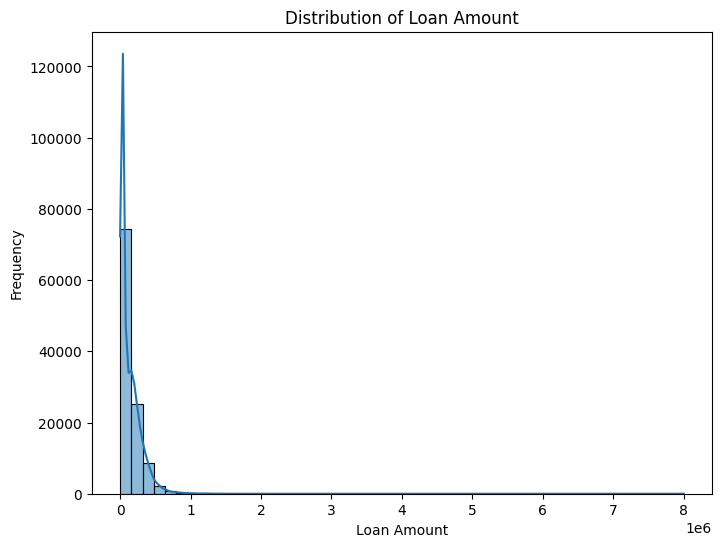

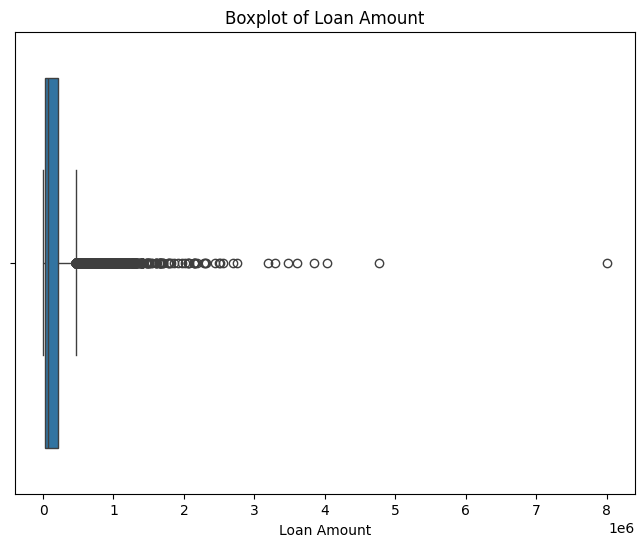

In [17]:
# Histogram for 'Amount'
plt.figure(figsize= (8,6))
sns.histplot(df_cleaned['Amount'], bins= 50, kde= True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# Boxplot to identify outliers
plt.figure(figsize= (8,6))
sns.boxplot(x= df_cleaned['Amount'])
plt.title('Boxplot of Loan Amount')
plt.xlabel('Loan Amount')
plt.show()

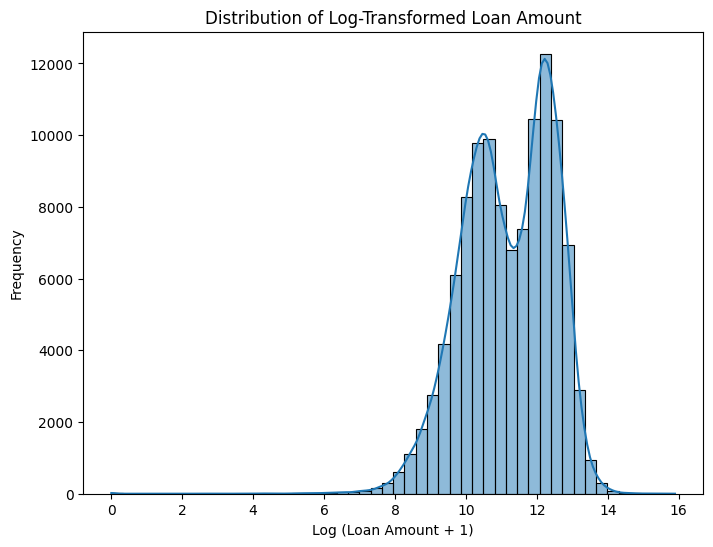

In [19]:
# Create a new column with log-transformed values
df_cleaned['log_Amount']= np.log1p(df_cleaned['Amount'])

# Visualize the transformed distribution
plt.figure(figsize= (8,6))
sns.histplot(df_cleaned['log_Amount'], bins= 50, kde= True)
plt.title('Distribution of Log-Transformed Loan Amount')
plt.xlabel('Log (Loan Amount + 1)')
plt.ylabel('Frequency')
plt.show()

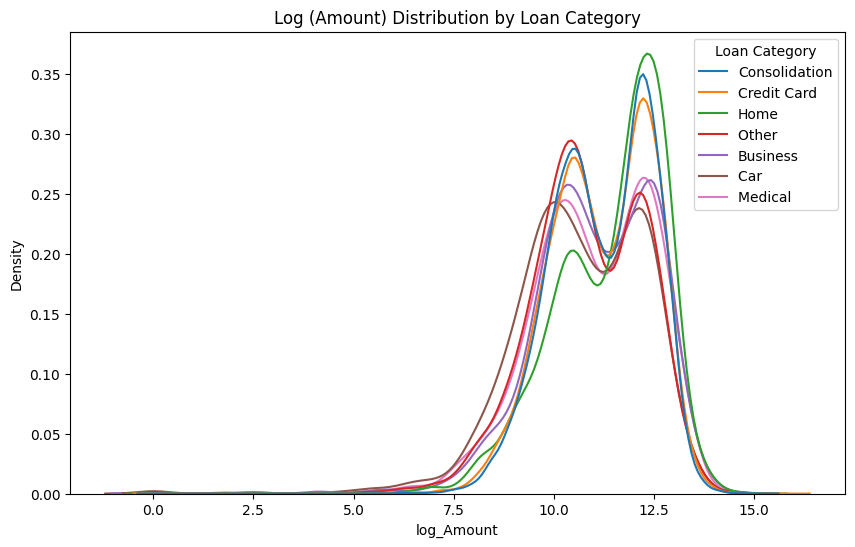

In [20]:
# Check if each loan category exhibits different range of amounts
plt.figure(figsize= (10,6))
sns.kdeplot(data= df_cleaned, x= 'log_Amount', hue= 'Loan Category', common_norm= False)
plt.title('Log (Amount) Distribution by Loan Category')
plt.show()

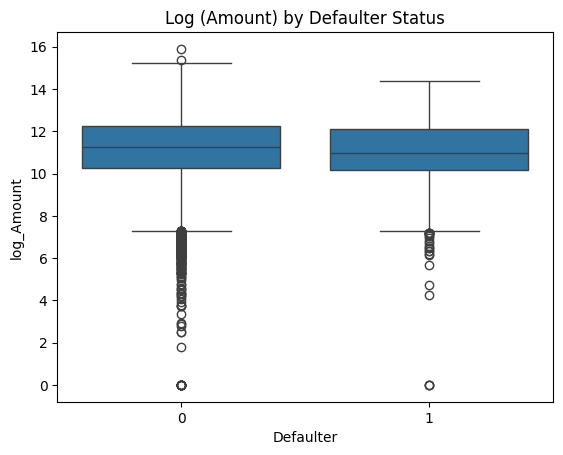

In [21]:
# Investigate how log-transformed amounts differ for defaulters vs. non-defaulters
sns.boxplot(data= df_cleaned, x= 'Defaulter', y= 'log_Amount')
plt.title('Log (Amount) by Defaulter Status')
plt.show()

In [22]:
# View group level stats for both 'Amount' and 'log_Amount'
df_cleaned.groupby('Loan Category')['Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Loan Category,,,,,,,,
Business,1340.0,138138.541045,169675.014278,0.0,23691.0,63949.5,212777.50,2073792.0
Car,999.0,103591.538539,130606.332119,0.0,16267.0,42579.0,155511.00,1056596.0
Consolidation,68839.0,136780.355874,151616.198539,0.0,29243.0,77670.0,204605.00,4026405.0
Credit Card,26692.0,138027.611344,164173.119596,0.0,28598.0,75903.5,205399.00,8000078.0
Home,6649.0,173844.507144,187605.791691,0.0,34032.0,126696.0,257634.00,3610743.0
Medical,1128.0,131118.417553,154704.467524,11.0,21810.5,59483.5,204278.75,1239155.0
Other,6153.0,113179.090037,152382.002783,0.0,20341.0,47616.0,162628.00,2290664.0


In [23]:
# Check how default rates vary across these categories and amounts
default_rates= df_cleaned.groupby('Loan Category')['Defaulter'].mean().reset_index()
print(default_rates)

   Loan Category  Defaulter
0       Business   0.199082
1           Car    0.081130
2  Consolidation   0.097868
3    Credit Card   0.070478
4           Home   0.091233
5       Medical    0.114155
6         Other    0.114196


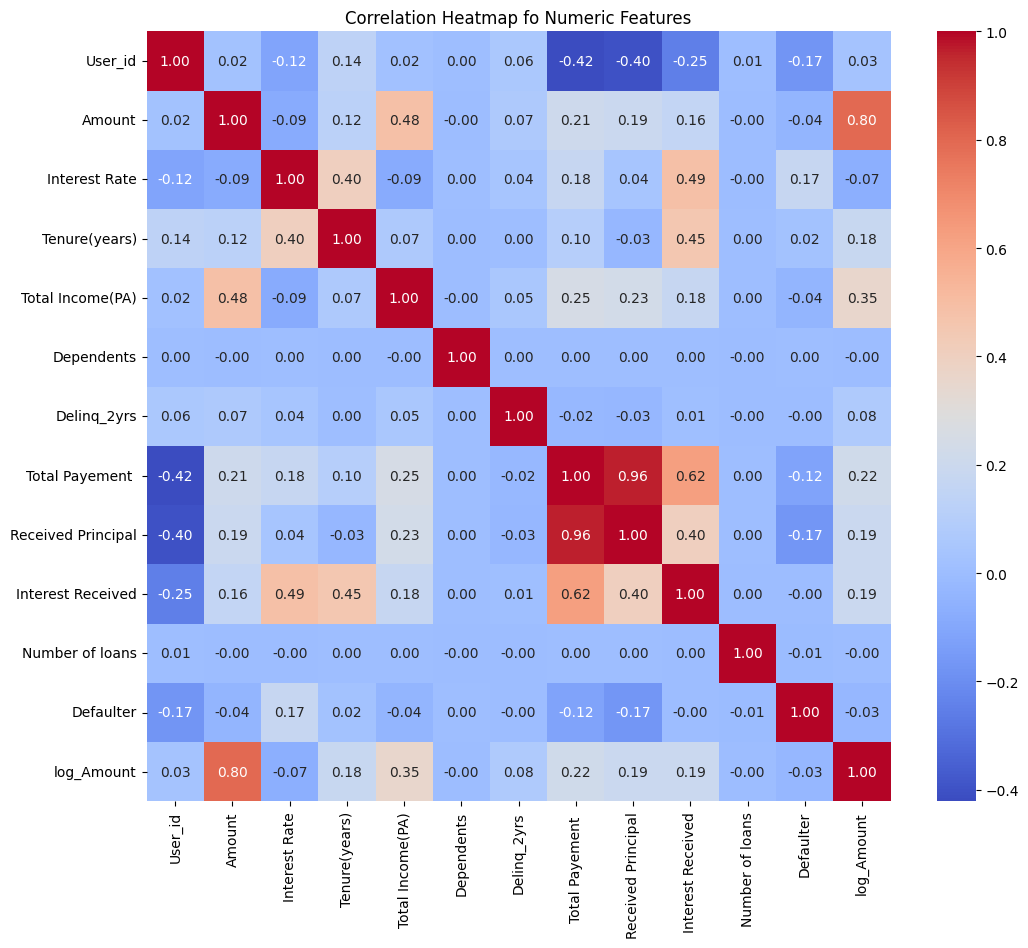

               Feature         VIF
0              User_id    5.028134
1               Amount    3.006504
2        Interest Rate   15.732925
3        Tenure(years)   39.632810
4     Total Income(PA)    3.508256
5           Dependents    2.973446
6          Delinq_2yrs    1.156220
7      Total Payement   874.481806
8   Received Principal  566.918987
9    Interest Received   58.018521
10     Number of loans    1.003271
11           Defaulter    1.518835
12          log_Amount   45.315655


In [27]:
# Select numeric columns
numeric_cols= df_cleaned.select_dtypes(include= [np.number])

# Drop rows with missing values for VIF calculation
numeric_cols_clean= numeric_cols.dropna()

# Plot the correlation heatmap
corr_matrix= numeric_cols_clean.corr()
plt.figure(figsize= (12,10))
sns.heatmap(corr_matrix, annot= True, fmt= '.2f', cmap= 'coolwarm')
plt.title('Correlation Heatmap fo Numeric Features')
plt.show()

# Calculate Variance Inflation Factor (VIF)
vif_data= pd.DataFrame()
vif_data['Feature']= numeric_cols_clean.columns
vif_data['VIF']= [variance_inflation_factor(numeric_cols_clean.values, i)
                  for i in range(len(numeric_cols_clean.columns))]

print(vif_data)

In [31]:
# List of categorical columns to encode
cat_cols= ['Loan Category', 'Employmet type', 'Tier of Employment', 
                    'Gender', 'Married', 'Home', 'Pincode', 'Social Profile', 'Is_verified']

# One-hot encode categorical columns (dropping the first cateogry to avoic dummy variable trap)
df_encoded= pd.get_dummies(df_cleaned, columns= cat_cols, drop_first= True)

# Save the processed DataFrame
df_encoded.to_csv('../data/processed_cleaned_data.csv', index= False)
print('Processed data saved to ../data/processed_cleaned_data.csv')

Processed data saved to ../data/processed_cleaned_data.csv
